In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.integrate import tplquad,dblquad,quad
from scipy import integrate
from scipy import optimize

In [3]:
data = pd.read_csv("DM_profile_contracted.csv",header=None) 
data.columns=["c1","c2"]
x=data["c1"]
x=np.array(x)
y=data["c2"]
y=np.array(y)
x1=np.log10(x)       #polynominal fitting under log scale
y1=np.log10(y)


Text(0, 0.5, 'log(r^2 ρ)')

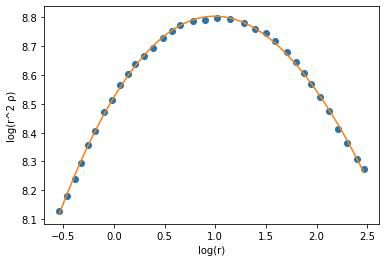

In [6]:
plt.plot(x1, y1, "o")

def f1(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

popt, pcov=optimize.curve_fit(f1, x1, y1)

x2 = np.linspace(x1.min(),x1.max(),100)
a1,b1,c1,d1=popt
y2=a1*x2**3+b1*x2**2+c1*x2+d1
plt.plot(x2, y2)
plt.xlabel('log(r)')
plt.ylabel('log(r^2 ρ)')

In [6]:
D=8#kpc
def rho_g0(r1,b,l):
    def r(r1):
        return np.sqrt(r1**2+2*r1*D*np.sin(b)*np.cos(l)+D**2)#coordinate transformation
    return (10**(a1*r(r1)**3+b1*r(r1)**2+c1*r(r1)+d1))/r(r1)**2

#to calculate the column density, I think the specific distant should be given



In [9]:
#I tried to calculate the column density with respect to distance, 
#but it was very time consuming after coordinate transformation
cd=np.array([])
for i in range(1,10):
    M0, err = integrate.tplquad(rho_g0, 0, i, 0, np.pi, 0, 2*np.pi)
    cd0=M0/(4*np.pi*i**2)
    cd=np.append(cd,cd0)

In [8]:
#in the original frame

def rho_g(r):
    return (10**(a1*r**3+b1*r**2+c1*r+d1))/r**2

cd=np.array([])
for i in range (1,10000):
    cd0,errb=quad(rho_g,0,i)
    cd=np.append(cd,cd0)

/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  
/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
